In [242]:
# Loads necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loads the dataset
data_path = 'study_performance.csv'
df = pd.read_csv(data_path)

# Displays the first few rows of the dataset
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [244]:
# gives us the summary of the central tendencys and dispersion of the dataset
print(df.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [246]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [248]:
# Checks for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Encodes the categorical variables
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
#Shows us the cleaned data
df.head()

Missing values in each column:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


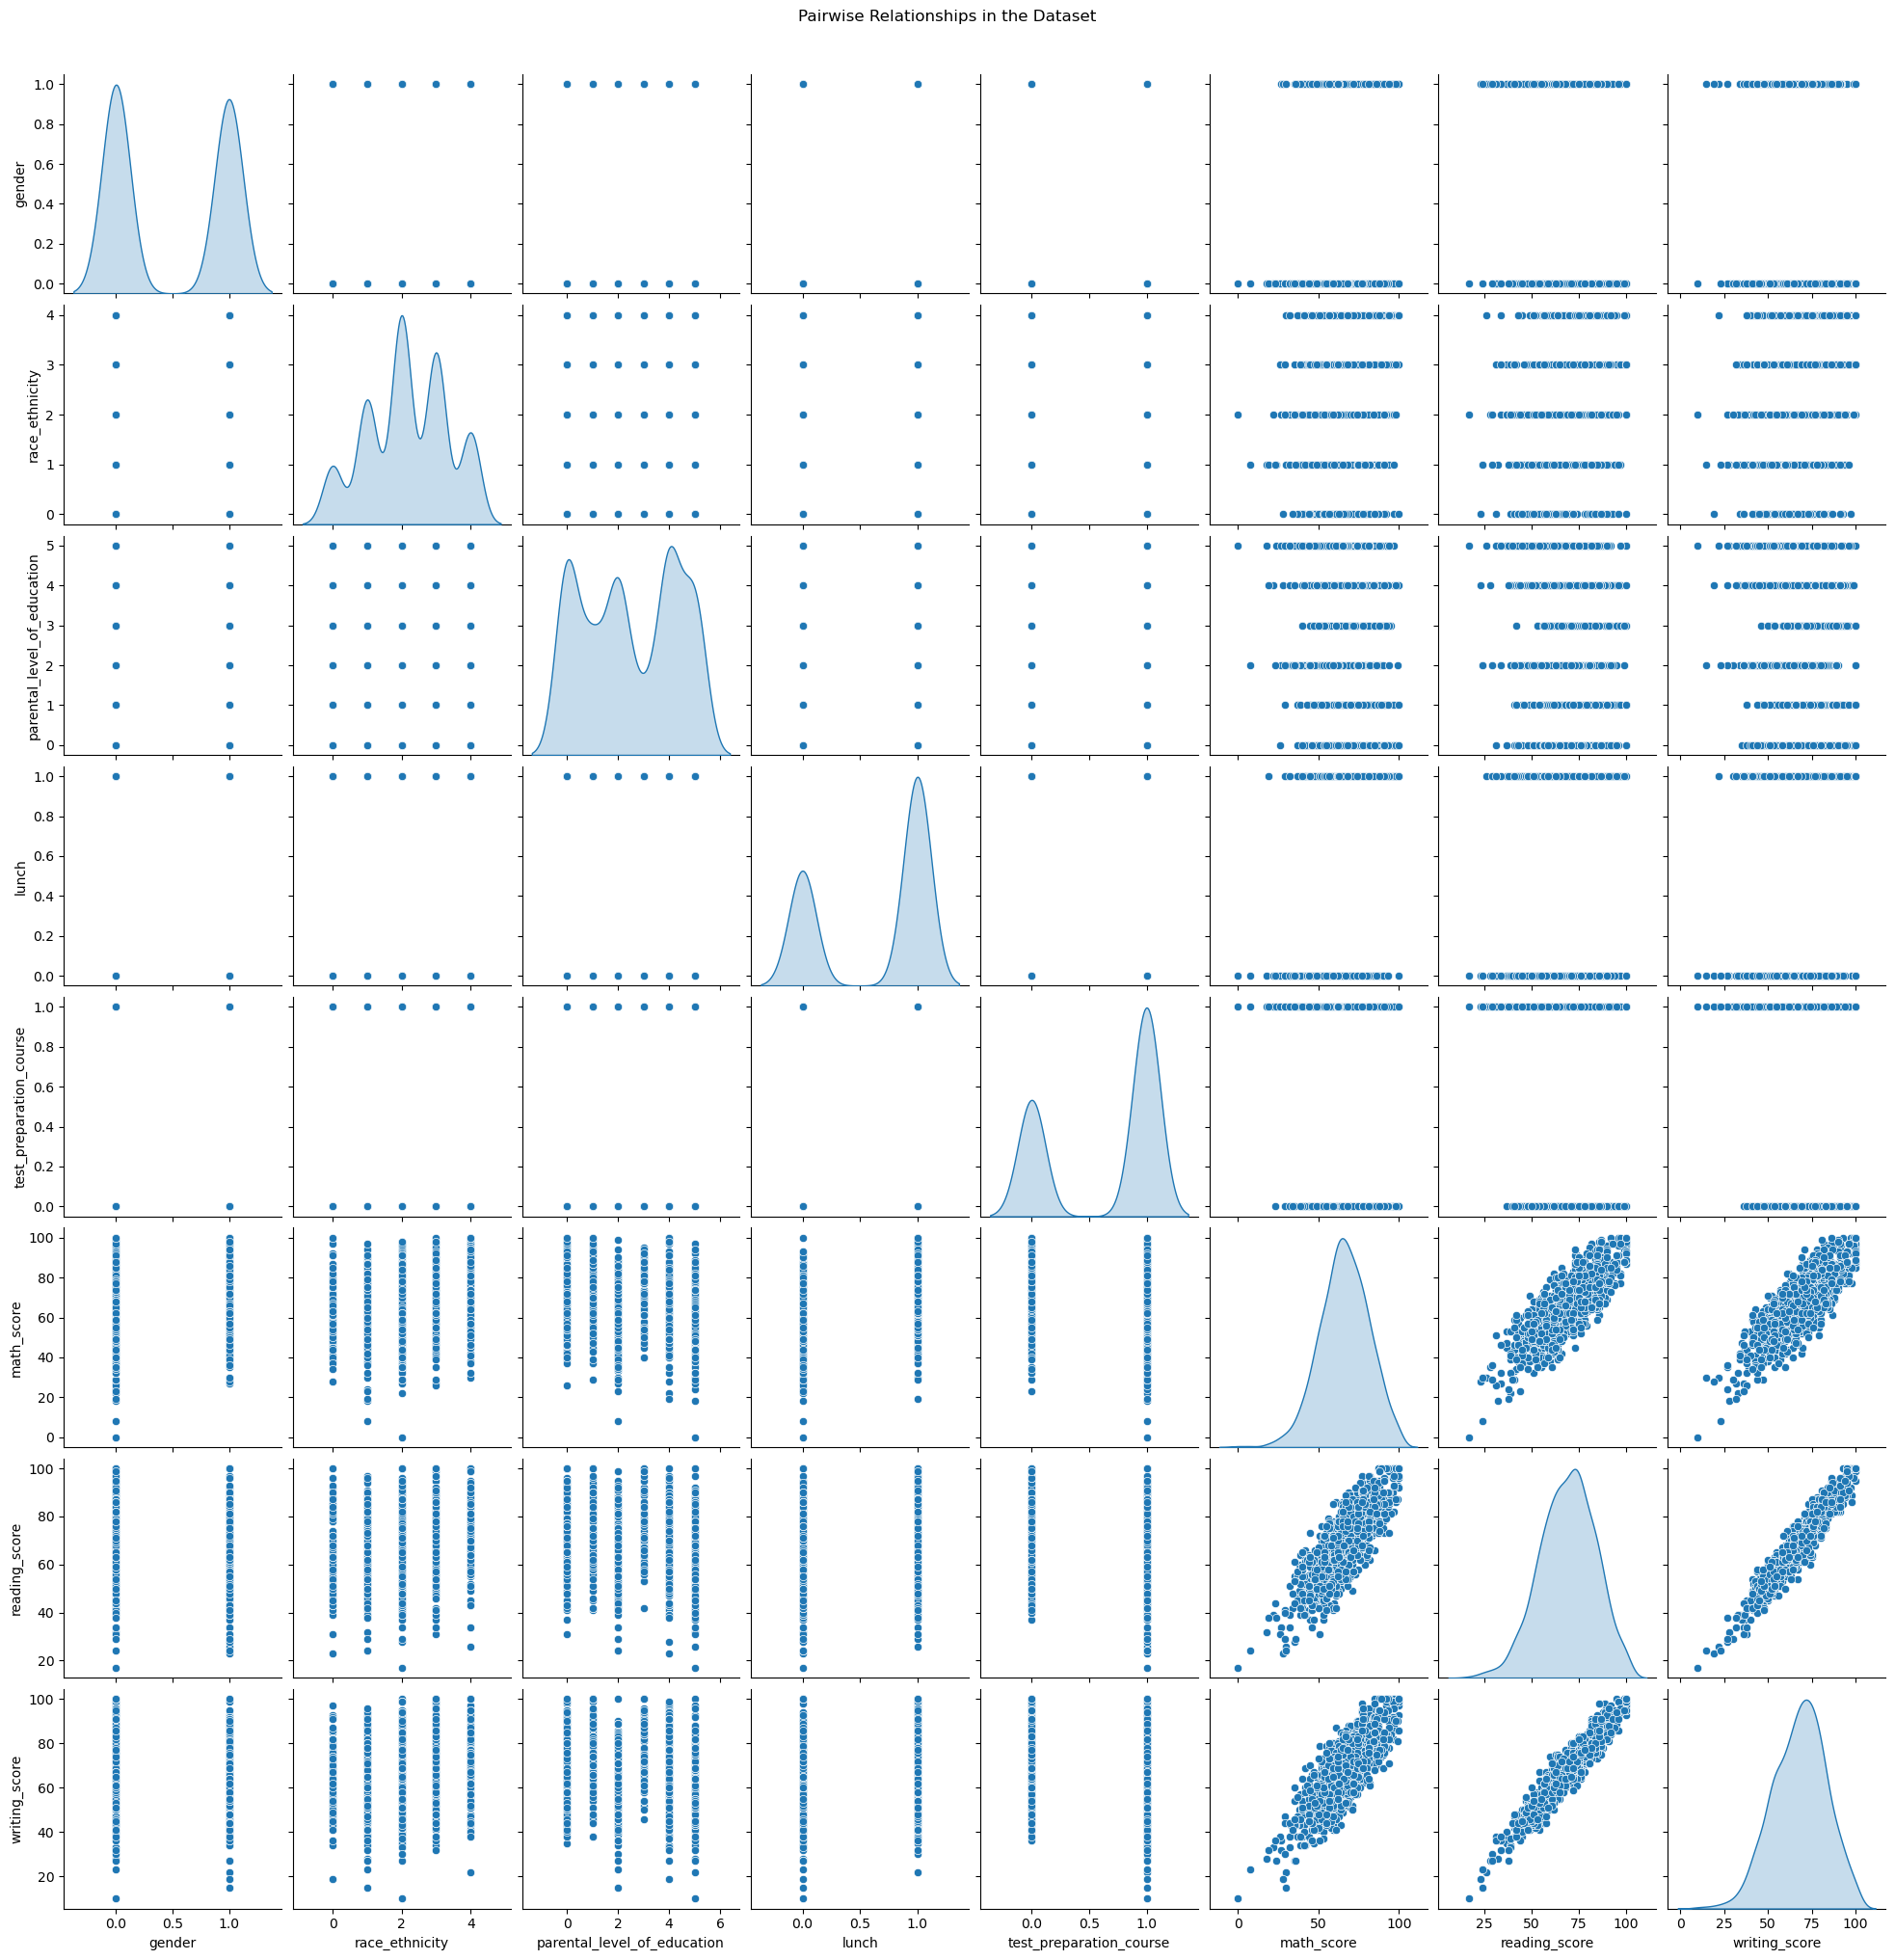

In [254]:
# Pairplot to see pairwise relationships in the dataset
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairwise Relationships in the Dataset', y=1.02)
plt.show()

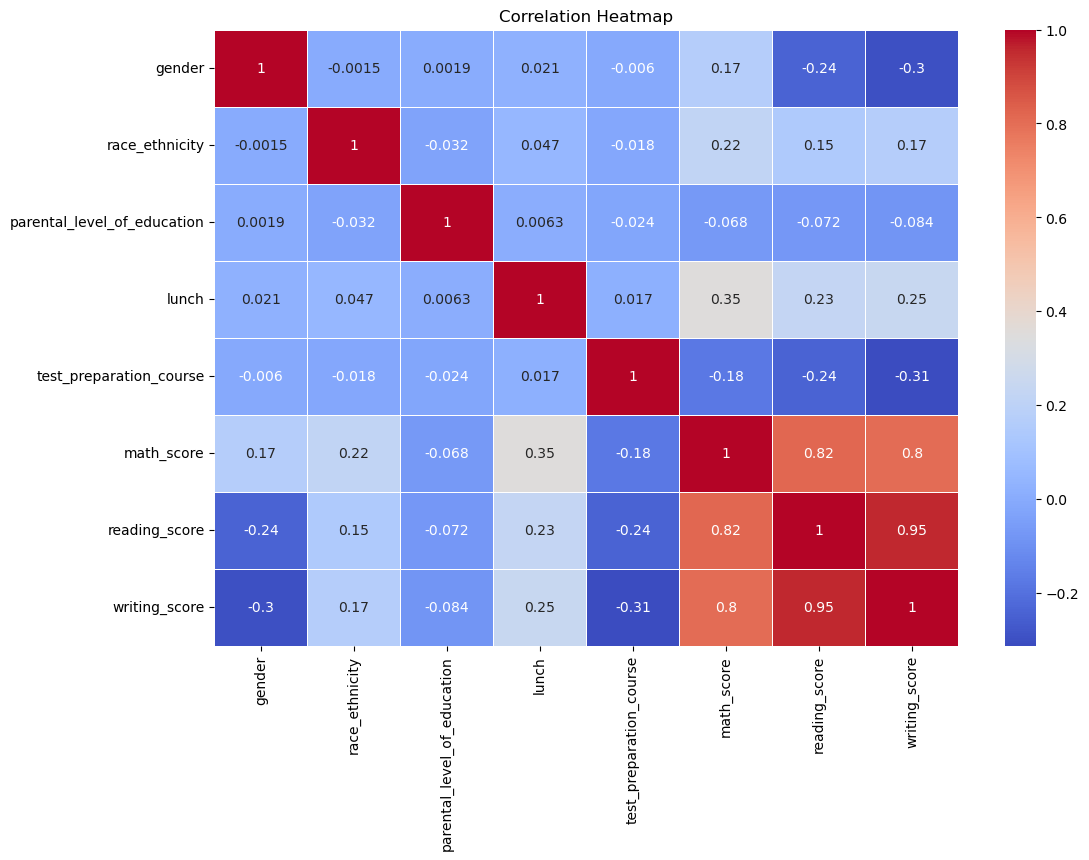

In [255]:
# Heatmap to see correlation between variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

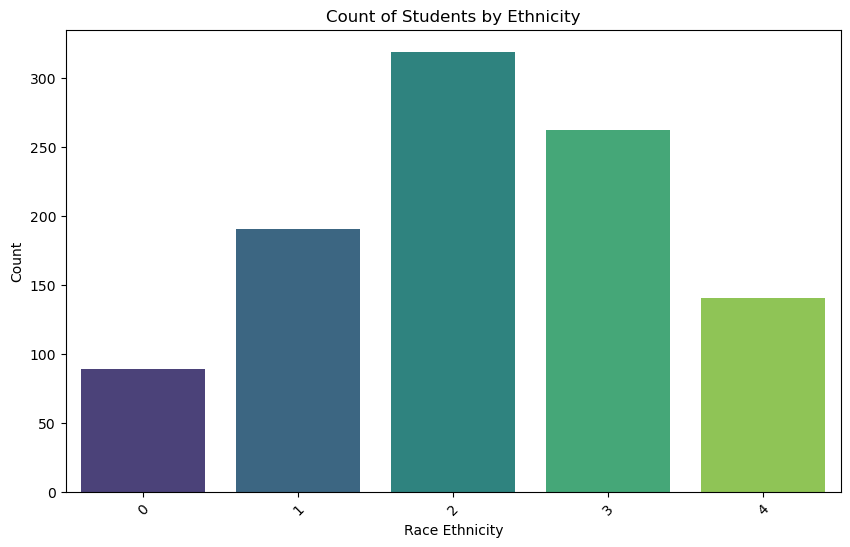

In [256]:
# Bar plot for categorical variable (example: 'ethnicity')
plt.figure(figsize=(10, 6))
sns.countplot(x='race_ethnicity', data=df, palette='viridis')
plt.title('Count of Students by Ethnicity')
plt.xlabel('Race Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

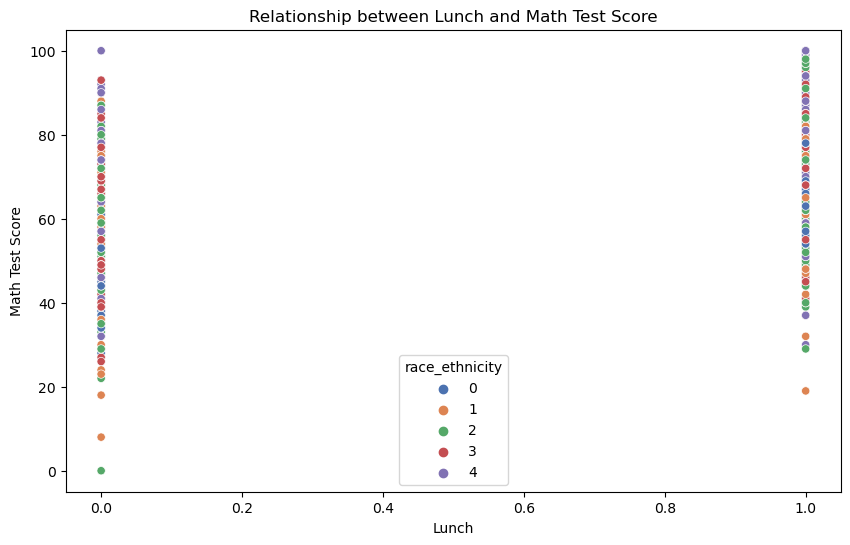

In [257]:
# Scatter plot to see relationship between students who eat lunch and their mast test scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lunch', y='math_score', data=df, hue='race_ethnicity', palette='deep')
plt.title('Relationship between Lunch and Math Test Score')
plt.xlabel('Lunch')
plt.ylabel('Math Test Score')
plt.show()

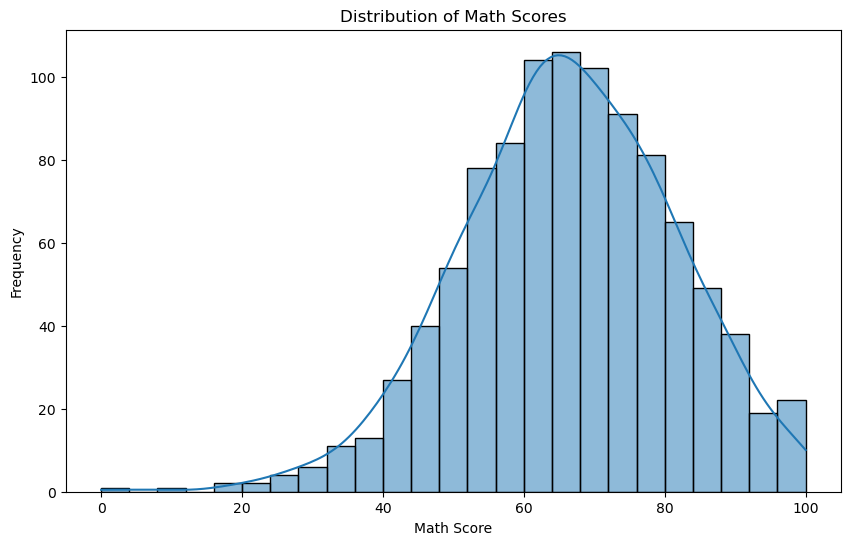

In [258]:
# Encodes categorical variables and shows us the plot for Math Scores
label_encoder = LabelEncoder()
for column in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[column] = label_encoder.fit_transform(df[column])

# Creates visualizations
# Distribution of Math scores
plt.figure(figsize=(10, 6))
sns.histplot(df['math_score'], kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

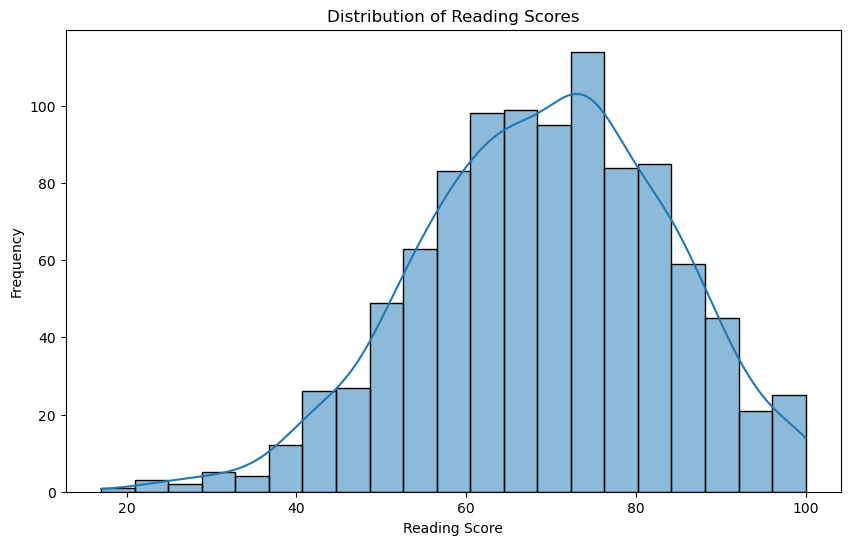

In [259]:
# Encodes categorical variables and shows us plot for Reading Scores
label_encoder = LabelEncoder()
for column in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[column] = label_encoder.fit_transform(df[column])

# Creates visualizations
# Distribution of Reading scores
plt.figure(figsize=(10, 6))
sns.histplot(df['reading_score'], kde=True)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

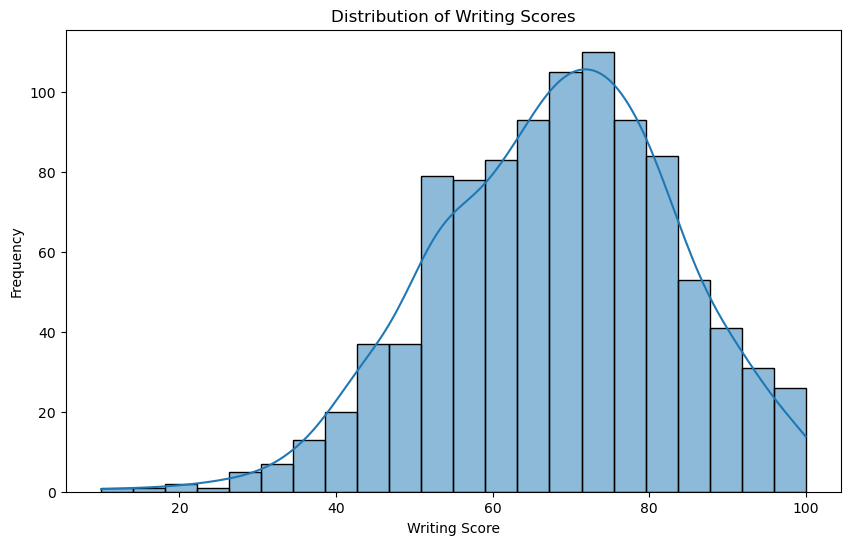

In [260]:
# Encodes categorical variables and shows us the plot for Math Scores
label_encoder = LabelEncoder()
for column in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[column] = label_encoder.fit_transform(df[column])

# Creates visualizations
# Distribution of Writing scores
plt.figure(figsize=(10, 6))
sns.histplot(df['writing_score'], kde=True)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

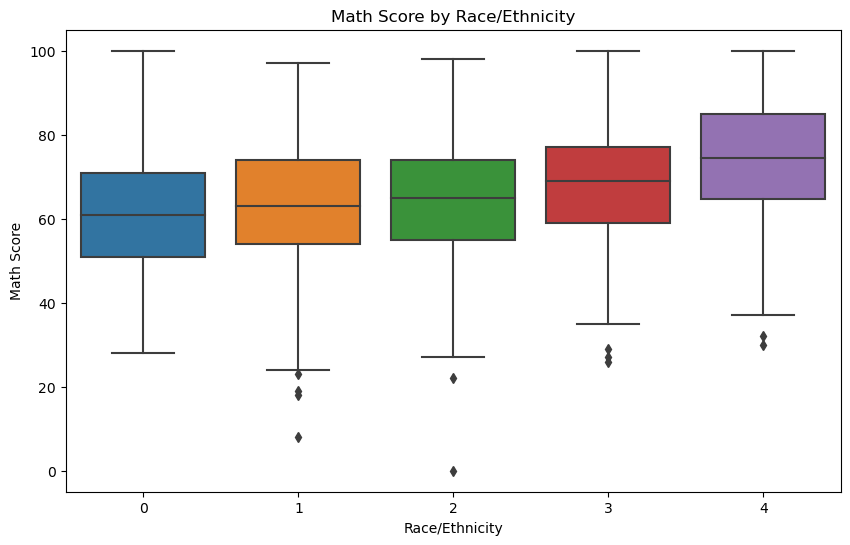

In [261]:
# Relationships between features and target
# Shows us Box Plot for Math Score vs Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race_ethnicity', y='math_score', data=df)
plt.title('Math Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')
plt.show()

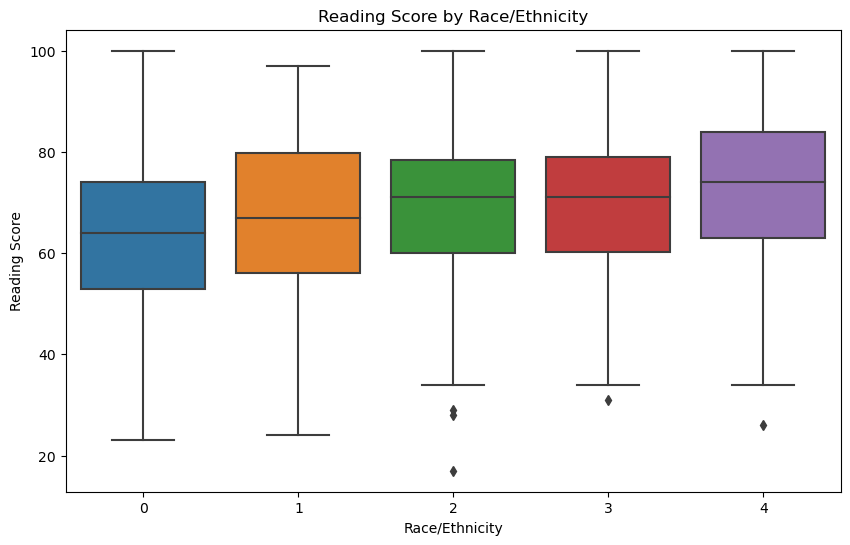

In [265]:
# Relationships between features and target
# Shows us Box Plot for Reading Score vs Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race_ethnicity', y='reading_score', data=df)
plt.title('Reading Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading Score')
plt.show()

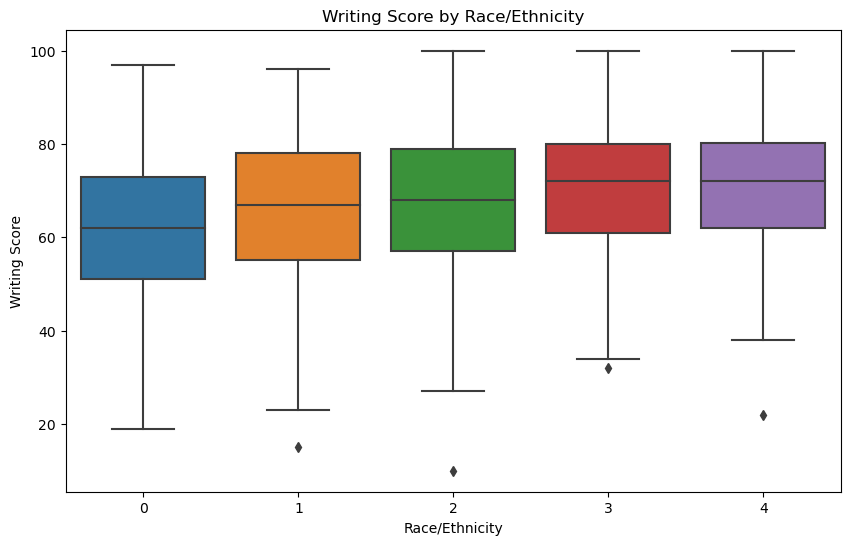

In [269]:
# Relationships between features and target
# Shows us Box Plot for Writing Score vs Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='race_ethnicity', y='writing_score', data=df)
plt.title('Writing Score by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Writing Score')
plt.show()

In [274]:
# Feature engineering (if necessary)
# Example: Creating a new feature as a product of three existing features
df['new_feature'] = df['math_score'] * df['reading_score'] * df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new_feature
0,0,1,1,1,1,72,72,74,383616
1,0,2,4,1,0,69,90,88,546480
2,0,1,3,1,1,90,95,93,795150
3,1,0,0,0,1,47,57,44,117876
4,1,2,4,1,1,76,78,75,444600


In [276]:
# Split the data into training and testing sets
X = df.drop('math_score', axis=1)
y = df['math_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [280]:
# Train and evaluate multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.08
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         0
          43       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00   

In [282]:
# Hyperparameter tuning with Grid Search
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f'{name} Best Params: {grid_search.best_params_}')
    y_pred = best_models[name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Best Model Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

Logistic Regression Best Params: {'C': 10}
Logistic Regression Best Model Accuracy: 0.07
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00   

In [283]:
# Standardizes the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defines models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Defines parameter grid for Grid Search
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Performs Grid Search and evaluate models
results = []
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Best Params': best_params,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    })

# Converts results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Best Params', 'Accuracy']])

                    Model                    Best Params  Accuracy
0     Logistic Regression                      {'C': 10}     0.075
1           Decision Tree              {'max_depth': 20}     0.115
2     k-Nearest Neighbors             {'n_neighbors': 3}     0.025
3  Support Vector Machine  {'C': 10, 'kernel': 'linear'}     0.140


In [284]:
# Logistic Regression feature importances (coefficients)
logistic_model = best_models['Logistic Regression']
feature_importance_logistic = pd.Series(logistic_model.coef_[0], index=X.columns)
print("Logistic Regression Feature Importances:")
print(feature_importance_logistic.sort_values(ascending=False))

# Decision Tree feature importances
tree_model = best_models['Decision Tree']
feature_importance_tree = pd.Series(tree_model.feature_importances_, index=X.columns)
print("Decision Tree Feature Importances:")
print(feature_importance_tree.sort_values(ascending=False))

Logistic Regression Feature Importances:
test_preparation_course        0.160562
parental_level_of_education   -0.943142
new_feature                   -0.946523
lunch                         -1.140608
race_ethnicity                -1.304347
writing_score                 -2.944029
gender                        -3.520583
reading_score                 -3.564989
dtype: float64
Decision Tree Feature Importances:
new_feature                    0.364347
reading_score                  0.177979
writing_score                  0.162188
parental_level_of_education    0.104830
race_ethnicity                 0.088935
test_preparation_course        0.041887
gender                         0.030142
lunch                          0.029691
dtype: float64


In [285]:
# Compares the Models for Reading Score
# Split the data into training and testing sets
X = df.drop('reading_score', axis=1)
y = df['reading_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

# kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('kNN Accuracy:', accuracy_score(y_test, y_pred_knn))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

# Cross-validation and Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print('Best Parameters for SVM:', grid.best_params_)

Linear Regression MSE: 18.24645033833018
Decision Tree Accuracy: 0.1
kNN Accuracy: 0.08
SVM Accuracy: 0.075
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .............

In [286]:
# Compares the Models for Math Score
# Split the data into training and testing sets
X = df.drop('math_score', axis=1)
y = df['math_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

# kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('kNN Accuracy:', accuracy_score(y_test, y_pred_knn))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

# Cross-validation and Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print('Best Parameters for SVM:', grid.best_params_)

Linear Regression MSE: 25.607155842957344
Decision Tree Accuracy: 0.1
kNN Accuracy: 0.08
SVM Accuracy: 0.085
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ............

In [287]:
# Compares the Models for Writing Score
# Split the data into training and testing sets
X = df.drop('writing_score', axis=1)
y = df['writing_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

# kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('kNN Accuracy:', accuracy_score(y_test, y_pred_knn))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

# Cross-validation and Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print('Best Parameters for SVM:', grid.best_params_)

Linear Regression MSE: 15.86228542526306
Decision Tree Accuracy: 0.065
kNN Accuracy: 0.05
SVM Accuracy: 0.1
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END .............

In [294]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[column] = label_encoder.fit_transform(df[column])

# Splits the math data into features and target variable
X = df.drop('math_score', axis=1)
y = df['math_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [296]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Defines parameter grid for Grid Search
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Performs Grid Search and evaluate models
results = []
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Best Params': best_params,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Best Params', 'Accuracy']])

                    Model                    Best Params  Accuracy
0     Logistic Regression                      {'C': 10}     0.075
1           Decision Tree              {'max_depth': 30}     0.090
2     k-Nearest Neighbors             {'n_neighbors': 3}     0.025
3  Support Vector Machine  {'C': 10, 'kernel': 'linear'}     0.140


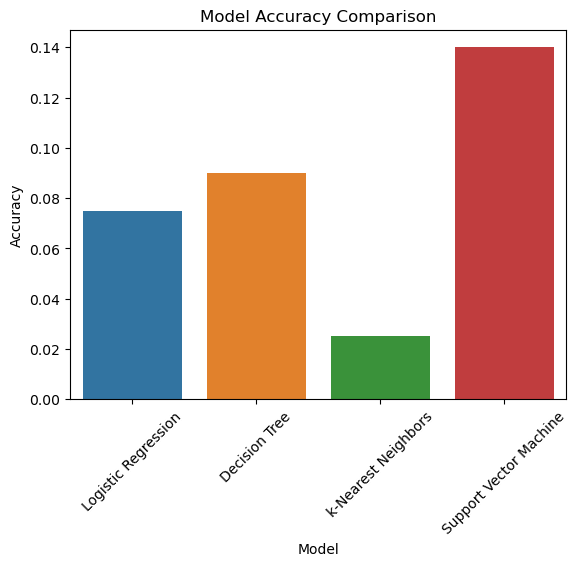

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gives us visualization of each model performance for math data
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[column] = label_encoder.fit_transform(df[column])

# Splits the reading data into features and target variable
X = df.drop('reading_score', axis=1)
y = df['reading_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Defines parameter grid for Grid Search
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Performs Grid Search and evaluate models
results = []
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Best Params': best_params,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Best Params', 'Accuracy']])

                    Model                    Best Params  Accuracy
0     Logistic Regression                      {'C': 10}     0.105
1           Decision Tree            {'max_depth': None}     0.125
2     k-Nearest Neighbors             {'n_neighbors': 3}     0.060
3  Support Vector Machine  {'C': 10, 'kernel': 'linear'}     0.155


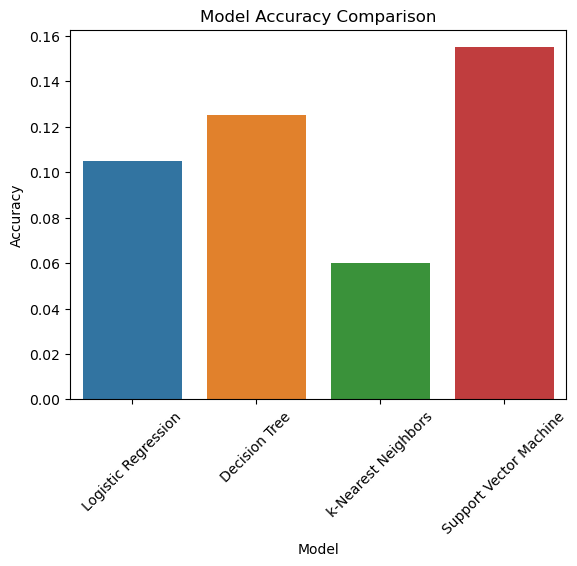

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gives us visualization of each model performance for the reading data
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [304]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']:
    df[column] = label_encoder.fit_transform(df[column])

# Splits the writing data into features and target variable
X = df.drop('writing_score', axis=1)
y = df['writing_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Defines parameter grid for Grid Search
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Performs Grid Search and evaluate models
results = []
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Best Params': best_params,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Best Params', 'Accuracy']])

                    Model                    Best Params  Accuracy
0     Logistic Regression                      {'C': 10}     0.110
1           Decision Tree              {'max_depth': 20}     0.060
2     k-Nearest Neighbors             {'n_neighbors': 5}     0.045
3  Support Vector Machine  {'C': 10, 'kernel': 'linear'}     0.115


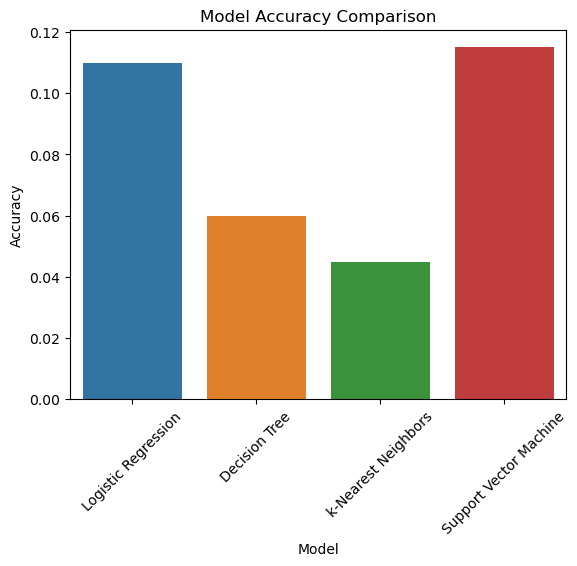

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gives us visualization of each model performance for the writing data
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

In [307]:
summary = []

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    summary.append({'Model': name, 'Best Params': grid_search.best_params_, 'Accuracy': accuracy})

# Converts the summary to a DataFrame for better visualization
summary_df = pd.DataFrame(summary)
summary_df

# Displays the best performing model
best_model = summary_df.loc[summary_df['Accuracy'].idxmax()]
print(f"The best performing model was {best_model['Model']} with an accuracy of {best_model['Accuracy']:.2f}.")

The best performing model was Support Vector Machine with an accuracy of 0.06.
